# Topic Modeling

 - Method of uncovering hidden structure in a collection of texts
 - Is a form of dimensionality reduction
 - Unsupervised Learning compared to clustering
 

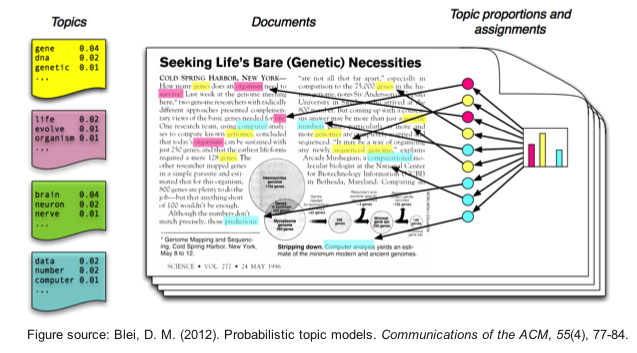

In [108]:
from IPython.display import Image
Image(filename='topic_model.png')

In [109]:
from nltk.corpus import brown
from gensim import models, corpora
from nltk import word_tokenize
from nltk.corpus import stopwords
import numpy as np
import re

In [110]:
NUM_TOPICS = 3
STOPWORDS = stopwords.words('english')
SEED = 10
np.random.seed(SEED)

In [111]:
# Dataset

doc1 = "Sugar is bad to consume. My sister likes to have sugar, but not my father."
doc2 = "My father spends a lot of time driving my sister around to dance practice."
doc3 = "Doctors suggest that driving may cause increased stress and blood pressure."
doc4 = "Sometimes I feel pressure to perform well at school, but my father never seems to drive my sister to do better."
doc5 = "Health experts say that Sugar is not good for your lifestyle."

data = [doc1, doc2, doc3, doc4, doc5]

In [112]:
def clean_text(text):
    '''Clean data : lower, stopword removal'''
    tokenized_text = word_tokenize(text.lower())
    cleaned_text = [t for t in tokenized_text if t not in STOPWORDS and re.match('[a-zA-Z\-][a-zA-Z\-]{2,}', t)]
    return cleaned_text

In [113]:
# Tokenize Data    
tokenized_data = []
for text in data:
    tokenized_data.append(clean_text(text))

# Build a Dictionary 
dictionary = corpora.Dictionary(tokenized_data)
 
# Transform the collection of texts to a numerical form
corpus = [dictionary.doc2bow(text) for text in tokenized_data]


# LDA – Latent Dirichlet Allocation 

In [114]:
# Build the LDA model
lda_model = models.LdaModel(corpus=corpus, num_topics=NUM_TOPICS, id2word=dictionary)

for num in range(NUM_TOPICS):
   print('\n Topic : ', lda_model.print_topic(num, 5))


 Topic :  0.075*"driving" + 0.048*"pressure" + 0.048*"blood" + 0.048*"suggest" + 0.048*"doctors"

 Topic :  0.045*"health" + 0.045*"sugar" + 0.045*"father" + 0.045*"lifestyle" + 0.045*"good"

 Topic :  0.108*"sugar" + 0.076*"sister" + 0.072*"father" + 0.062*"bad" + 0.062*"likes"


# LSA or LSI – Latent Semantic Analysis or Latent Semantic Indexing 

In [115]:
# Build the LSI model
lsi_model = models.LsiModel(corpus=corpus, num_topics=NUM_TOPICS, id2word=dictionary)
for num in range(NUM_TOPICS):
   print('\n Topic : ',lsi_model.print_topic(num, 5))


 Topic :  0.426*"father" + 0.426*"sister" + 0.261*"sugar" + 0.246*"pressure" + 0.192*"seems"

 Topic :  -0.534*"sugar" + 0.298*"pressure" + -0.207*"likes" + -0.207*"consume" + -0.207*"bad"

 Topic :  0.363*"driving" + 0.224*"increased" + 0.224*"may" + 0.224*"doctors" + 0.224*"blood"


In [118]:
text = "The economy is working better than ever"
bow = dictionary.doc2bow(clean_text(text))
 
print('LDA : ', lda_model[bow])
print('LSI : ', lsi_model[bow])


LDA :  [(0, 0.16819178), (1, 0.66239077), (2, 0.16941747)]
LSI :  [(0, 0.19171406873118174), (1, 0.10466366342375454), (2, -0.19506410997354737)]
